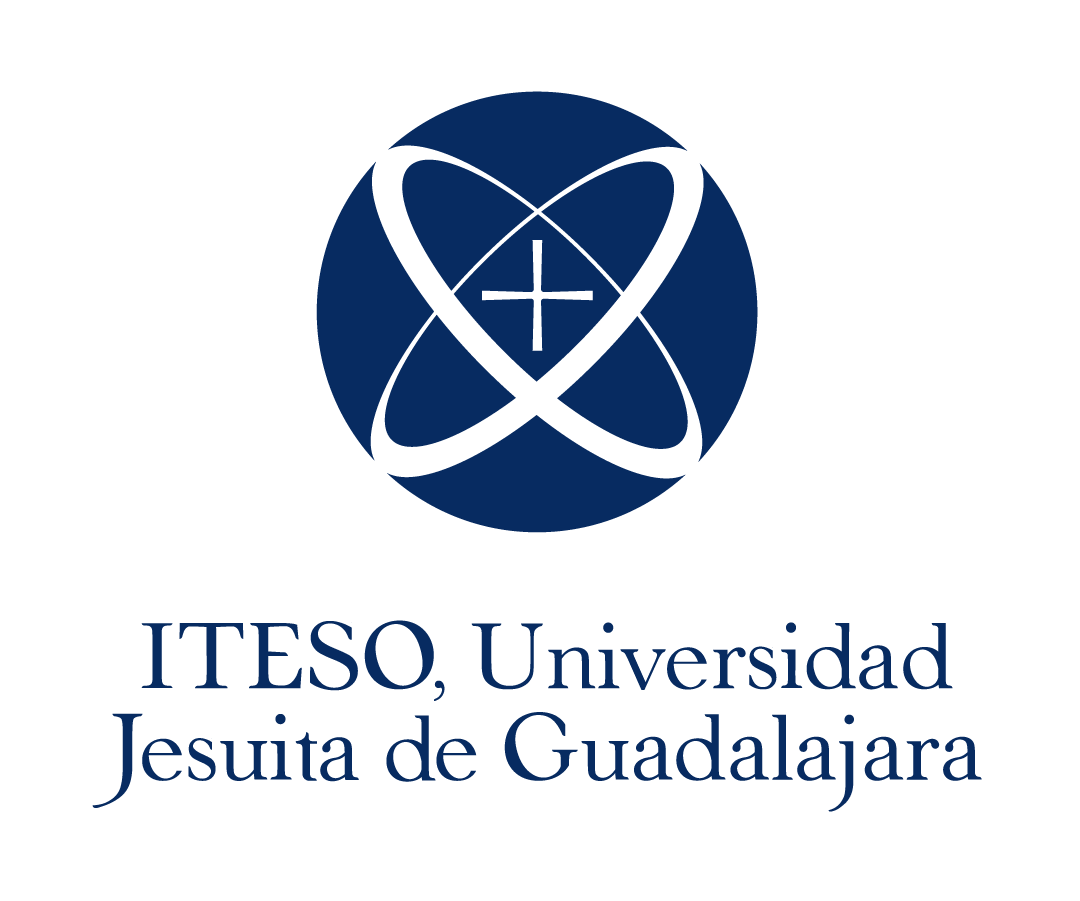

# Optimización del Diseño de Puentes mediante Análisis de Tensiones y Procesos Gaussianos

Por: René Alejadnro González Velázquez

Fecha:29/11/2024

Carrera: Ingeniería Civil

##Introducción

El diseño de puentes es esencial en la ingeniería civil, ya que estas estructuras son clave para el transporte y la conexión. El desafío consiste en encontrar un equilibrio entre la seguridad estructural y los costos, dado que un diseño demasiado robusto puede aumentar los gastos, mientras que uno inadecuado puede poner en riesgo la estabilidad. Es fundamental gestionar correctamente las tensiones internas generadas por las cargas aplicadas para garantizar la durabilidad y seguridad del puente.

Este reto es central en la ingeniería civil, donde optimizar el diseño no solo mejora la seguridad, sino también la eficiencia económica. Técnicas como el Método de Elementos Finitos (FEM) y los procesos gaussianos permiten anticipar las tensiones y optimizar el uso de materiales, resultando en diseños más seguros y rentables.

##Marco Teórico

Para abordar el problema de optimización de puentes, se deben entender los siguientes conceptos:

* **Optimización estructural:** Ajuste de las variables de diseño (como el largo y la altura del puente) para minimizar el costo o las tensiones.
* **Análisis de tensiones:** Las tensiones internas generadas por las cargas aplicadas a la estructura.
* **Método de Elementos Finitos (FEM):** Técnica computacional para resolver problemas estructurales.
* **Proceso Gaussiano:** Herramienta estadística para modelar y predecir la distribución de tensiones en el puente.

##Objetivos
###Generales
Optimizar el diseño de un puente minimizando costos y tensiones, garantizando la seguridad estructural.

###Específicos
* Aplicar FEM para simular tensiones en el puente.
* Usar un modelo de proceso gaussiano para predecir tensiones en función de las dimensiones.
* Optimizar el costo del puente considerando las tensiones y las dimensiones.

## Descripción del Modelo
### Criterio de Optimización

El objetivo es minimizar el costo del puente, que incluye el costo de materiales y la seguridad estructural, que depende de las tensiones en la estructura.

#### Variables de Control
* Largo y altura del puente: Variables que determinan el diseño y el comportamiento estructural.

## Función de Costo

El costo se calcula como la suma del costo material y el costo de seguridad, con base en las tensiones máximas.

## Restricciones

El diseño debe cumplir con las restricciones de seguridad (tensiones máximas) y el presupuesto disponible.

## Simulación y Optimización

Se simula el puente usando FEM para calcular las tensiones bajo una carga. Luego, se aplica un modelo de optimización para encontrar las dimensiones óptimas del puente, minimizando el costo mientras se mantiene la seguridad.

## Visualizaciones

* Distribución de tensiones: Representación de cómo varían las tensiones a lo largo del puente.
* Proyección del costo: Gráfico que muestra cómo cambia el costo del puente en función del largo.
* Representación gráfica del puente: Visualización del puente con pilares y arco, mostrando cómo las tensiones afectan el diseño.

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


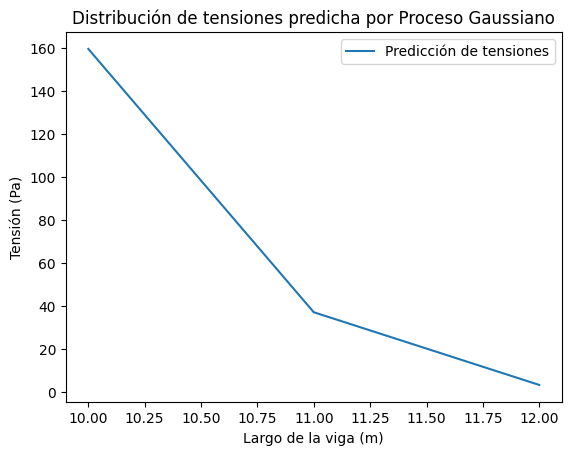

Dimesiones optimas:  Largo 8.27397044843969 Anlto 0.46809245128496196
Costo 774.5966692414848


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

def calcular_tensiones(dimension, carga):
    largo, alto = dimension
    area = largo * alto
    tension = carga / area
    return tension

def modelo_gaussiano(X_train, y_train, X_test):
    kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
    gp.fit(X_train, y_train)
    y_pred, sigma = gp.predict(X_test, return_std=True)
    return y_pred

def funcion_objetivo(dimension):
    carga = 1000 #Newtons
    tension = calcular_tensiones(dimension, carga)

    costo_material = dimension[0] * dimension[1] * 100
    seguridad = tension * 1.5
    return costo_material + seguridad

X_train = np.array([[5, 0.2], [6, 0.25], [7, 0.3], [8, 0.35], [9, 0.4]])
y_train = np.array([calcular_tensiones(d, 1000) for d in X_train])

X_test = np.array([[10, 0.45], [11, 0.5], [12, 0.55]])
predicciones_tensiones = modelo_gaussiano(X_train, y_train, X_test)

plt.plot(X_test[:, 0], predicciones_tensiones, label="Predicción de tensiones")
plt.xlabel("Largo de la viga (m)")
plt.ylabel("Tensión (Pa)")
plt.title("Distribución de tensiones predicha por Proceso Gaussiano")
plt.legend()
plt.show()

resultado_optimo = minimize(funcion_objetivo, [5, 0.2], bounds=[(4, 15), (0.1, 1.0)])
print("Dimesiones optimas: ", "Largo", resultado_optimo.x[0], "Anlto", resultado_optimo.x[1])
print("Costo", resultado_optimo.fun)


Al realizar el calculo correspondiente y utilizando el metodo gaussiano podemos decir que mientras mas larga sea la viga, las tensiones se distribuyen de mejor manera y de acuerdo a la optimizacion, en la que en este caso se minimizo el largto y lo anto del puente, se puede que las dimesiones es 8.27 y de alto 0.47, ya que esto de igual manera te dara un costo de 774.60 precio por unidad cuadadra.

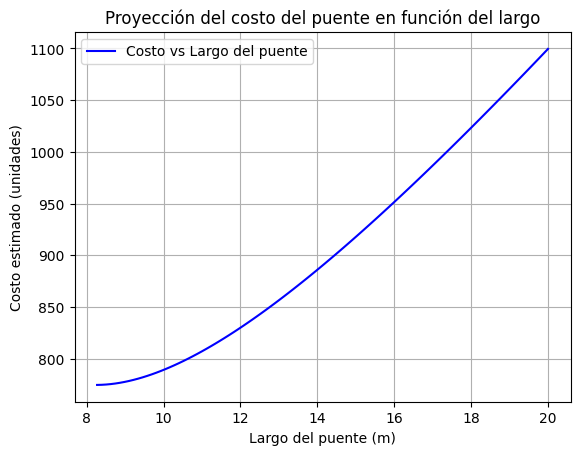

In [72]:
def calcular_tensiones(dimension, carga):
    largo, alto = dimension
    area = largo * alto
    tension = carga / area
    return tension

def funcion_objetivo(dimension):
    carga = 1000  # Newtons
    tension = calcular_tensiones(dimension, carga)

    costo_material = dimension[0] * dimension[1] * 100
    seguridad = tension * 1.5
    return costo_material + seguridad

def proyeccion_costo(largos, alto):
    costos = []
    for largo in largos:
        dimension = [largo, alto]
        costo = funcion_objetivo(dimension)
        costos.append(costo)
    return np.array(costos)

largos = np.linspace(8.27, 20, 100)
alto = 0.47
costos = proyeccion_costo(largos, alto)

plt.plot(largos, costos, label="Costo vs Largo del puente", color='b')
plt.xlabel("Largo del puente (m)")
plt.ylabel("Costo estimado (unidades)")
plt.title("Proyección del costo del puente en función del largo")
plt.legend()
plt.grid(True)
plt.show()


A través de la representación anteriorn en la que obtimos los valores de los cuales tendra nuestro puente, esos valores los usamos para poder representar el costo estimado respecto al largo del puente, y la representacion en la gráfica resulta muy logica ya que mientras mas largo sea el puente el costo para hacer el puente es mucho mayor que si es mucho más corto, ya que nos habla de que para un puente con las mismas especificaciones de 20 m de largo, el costo por unidad es cerca de 1,100, lo que resulta logico este resultado.

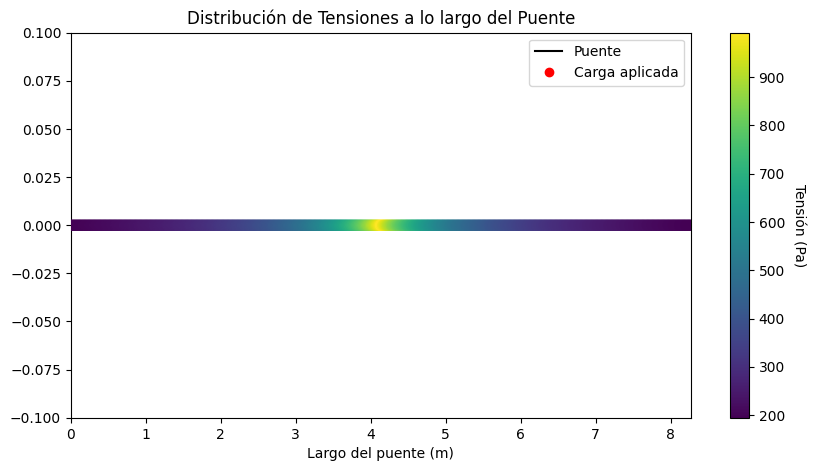

In [73]:
from matplotlib import cm

def calcular_tensiones_puente(largos, carga, largo_puente):
    tensiones = np.zeros_like(largos)
    for i, largo in enumerate(largos):
        distancia = abs(largo - largo_puente / 2)
        tensiones[i] = carga / (distancia + 1)
    return tensiones

largo_puente = 8.27  # metros
alto_viga = 0.47    # metros
carga_aplicada = 1000  # Newtons

largos = np.linspace(0, largo_puente, 500)
tensiones = calcular_tensiones_puente(largos, carga_aplicada, largo_puente)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(largos, np.zeros_like(largos), color='black', label="Puente") #Puente como una linea
norm = plt.Normalize(vmin=tensiones.min(), vmax=tensiones.max())  # Normalizar las tensiones
cmap = cm.viridis  # Mapa de colores para tensiones

ax.scatter(largos, np.zeros_like(largos), c=tensiones, cmap=cmap, norm=norm, s=50, zorder=5)

cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Tensión (Pa)', rotation=270, labelpad=15)

ax.plot(largo_puente / 2, 0, 'ro', label="Carga aplicada")

ax.set_ylim(-0.1, 0.1)
ax.set_xlim(0, largo_puente)
ax.set_xlabel("Largo del puente (m)")
ax.set_title("Distribución de Tensiones a lo largo del Puente")
ax.legend()

plt.show()


En la gráfica anterior se grafico la forma en la que las tensiones se distribuyen a lo largo del puente, algo que es muy importante ya que de esta manera podemos visualizar los puntos más debiles del puente y en el que este se puede llegar a fracturar, por lo que de esta manera podemos ver que el punyto de más propenso a fracturas es exactamente en la mitad del puente, por lo que a partir de esto podemos trabajar en ello y poder refozar de mejor manera esta parte del puente para que al momento de ejcutar el proyecto no sea propenso a estres y provoque una fractura, que provoque catrastrofes.

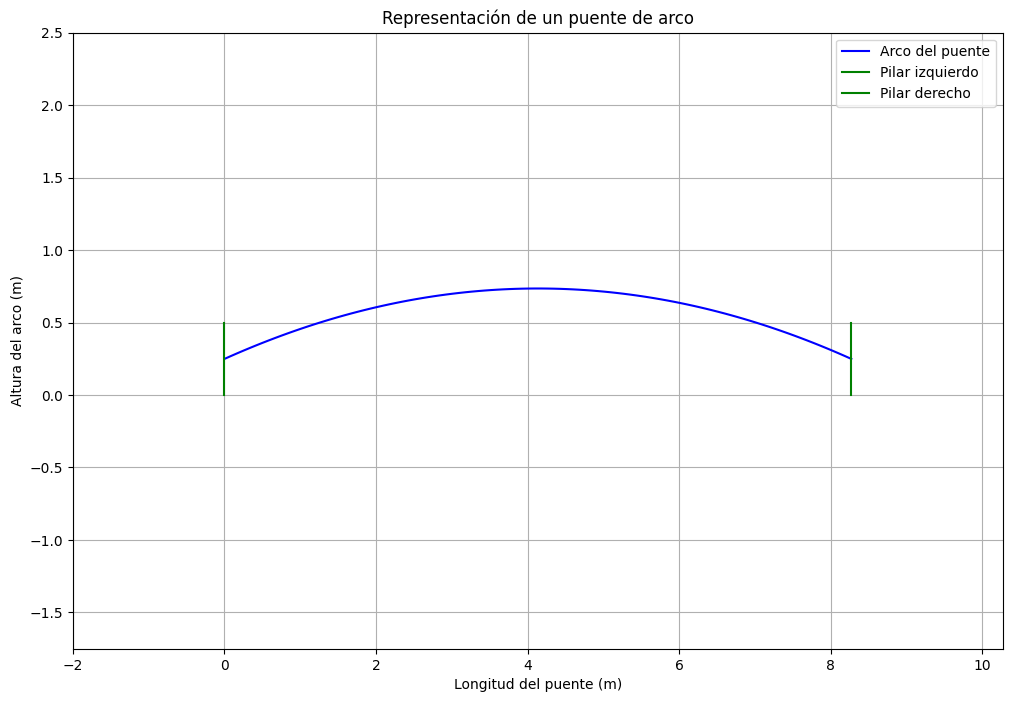

In [70]:
def generar_arco(largo_arco, altura_arco):
    x = np.linspace(0, largo_arco, 100)
    y = -((x - largo_arco / 2)**2) / (largo_arco / 2)
    y = y * altura_arco * 0.25
    y = espesor_pilares + y + altura_arco / 2
    return x, y

largo_arco = 8.27
altura_arco = 0.47
espesor_pilares = 0.5

x_arco, y_arco = generar_arco(largo_arco, altura_arco)

plt.figure(figsize=(12, 8))

plt.plot(x_arco, y_arco, label="Arco del puente", color='b')

plt.plot([0, 0], [0, espesor_pilares], color='g', label="Pilar izquierdo")
plt.plot([largo_arco, largo_arco], [0, espesor_pilares], color='g', label="Pilar derecho")

plt.xlim(-2, largo_arco + 2)
plt.ylim(min(y_arco)-2, espesor_pilares + 2)

plt.xlabel("Longitud del puente (m)")
plt.ylabel("Altura del arco (m)")
plt.title("Representación de un puente de arco")

plt.legend()
plt.grid(True)

plt.show()


En la gráfica anterior se ve una representación de lo que puede ser el puente ya al momento de hacerlo en este caso es un puente muy chiquito pero sirve como representación, para que posteriormente pasarlo a una aplicacion de modelados como Autocad, Revit, etc.

## Conclusiones

Este proyecto ha sido un reto interesante, pues integró herramientas avanzadas de optimización y simulación en el diseño de puentes. A través del Método de Elementos Finitos (FEM) y procesos gaussianos, logramos optimizar el diseño de un puente, equilibrando costos y seguridad. Aunque el problema era complejo, la aplicación de los métodos vistos en clase, como la optimización de funciones no convexas por ejemplo, la caul resultó ser altamente fructífera.

Este trabajo resalta la importancia de la simulación matemática en la ingeniería civil, mostrando cómo herramientas avanzadas pueden mejorar la eficiencia y seguridad en el diseño de infraestructuras. La experiencia ha sido enriquecedora y ha evidenciado el valor de la optimización computacional en la toma de decisiones en ingeniería.

## REFERENCIAS

* López, D. (2020). Análisis FEM/DEM de algoritmos de contacto con aplicación a estructuras (Tesis de maestría). Universitat Politècnica de València. http://hdl.handle.net/10251/150106
* Barros González, B. (2023). Methodologies for finite element modeling, calibration and damage prediction in aging bridges using experimental dynamical data (Tesis doctoral, Universidade de Vigo). Universidad de Salamanca y Universidade de Vigo. https://hdl.handle.net/10251/150106
* Calderón, W. R. (2007). Optimización aplicada a la calibración y validación de modelos de elementos finitos de puentes. Ingeniería, 17(1), 43-59.